# Airbnb Data Analysis Portfolio Project

## 1. Project Overview
This project explores Airbnb listing data to uncover trends in **pricing, availability, and customer preferences**. The objective is to analyze **factors influencing rental prices** and **occupancy rates**, providing insights valuable to hosts, travelers, and market analysts.

## 2. Introduction
Airbnb has transformed the hospitality industry by providing an alternative to traditional hotels. Understanding Airbnb pricing dynamics and occupancy trends helps hosts optimize their listings and provides travelers with insights into pricing variations across locations. This analysis examines key factors influencing Airbnb rental performance.

## 3. Data Cleaning
### 3.1 Dataset Overview
- **Source:** Airbnb listings dataset
- **Key Columns:**
  - `Listing ID` (Unique identifier for listings)
  - `Host ID` (Unique identifier for hosts)
  - `Neighborhood` (Location of the listing)
  - `Room Type` (Entire home, private room, or shared room)
  - `Price` (Cost per night)
  - `Availability` (Number of available nights per year)
  - `Number of Reviews` (Customer feedback count)

### 3.2 Data Cleaning Process
- Removed duplicate records to ensure dataset integrity.
- Handled missing values for essential fields like `price` and `availability`.
- Standardized `price` column by converting to numerical format.
- Categorized `room type` for easy analysis.

## 4. Exploratory Data Analysis (EDA)
### 4.1 Pricing Trends
- Analyzed the distribution of prices across different neighborhoods.
- Identified factors influencing price variations such as **room type, location, and customer demand**.
- Found luxury areas with significantly higher listing prices.

### 4.2 Availability & Occupancy Rates
- Studied patterns in Airbnb availability across different times of the year.
- Found that **seasonality plays a major role in occupancy rates**.
- Listings with high availability often had lower prices, suggesting price elasticity.

### 4.3 Customer Reviews & Ratings
- Analyzed the relationship between **review counts and price/occupancy rates**.
- Highly-rated listings tended to have more bookings, indicating trust as a key factor.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('datasets.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20765,2.473690e+07,Rental unit in New York · ★4.75 · 1 bedroom · ...,186680487,Henry D,Manhattan,Lower East Side,40.711380,-73.991560,Private room,45.0,...,29/09/23,1.81,1.0,157.0,12.0,No License,4.75,1,1,1
20766,2.835711e+06,Rental unit in New York · ★4.46 · 1 bedroom · ...,3237504,Aspen,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,...,01/07/23,0.48,1.0,0.0,1.0,No License,4.46,1,2,1
20767,5.182527e+07,Rental unit in New York · ★4.93 · 1 bedroom · ...,304317395,Jeff,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,...,08/12/23,2.09,1.0,0.0,27.0,No License,4.93,1,1,1
20768,7.830000e+17,Rental unit in New York · ★5.0 · 1 bedroom · 1...,163083101,Marissa,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,115.0,...,17/09/23,0.91,1.0,363.0,7.0,No License,5,1,1,1


In [15]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

In [8]:
df.shape

(20770, 22)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [19]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,1.723592
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.211993
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


In [20]:
df.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      7
latitude                           7
longitude                          7
room_type                          7
price                             34
minimum_nights                     7
number_of_reviews                  7
last_review                        7
reviews_per_month                  7
calculated_host_listings_count     7
availability_365                   7
number_of_reviews_ltm              7
license                            0
rating                             0
bedrooms                           0
beds                               0
baths                              0
dtype: int64

In [23]:
df.dropna(inplace=True)
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [25]:
df.duplicated().sum()

12

In [26]:
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
6,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
7,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
8,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
9,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1
10,4.958498e+07,Rental unit in New York · ★5.0 · 1 bedroom · 1...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.759950,-73.992960,Entire home/apt,115.0,...,29/07/23,0.16,139.0,276.0,2.0,No License,5,1,1,1
20736,7.990000e+17,Rental unit in New York · 2 bedrooms · 2 beds ...,224733902,CozySuites Copake,Manhattan,Upper East Side,40.768970,-73.957592,Entire home/apt,153.0,...,15/09/23,0.41,8.0,308.0,2.0,No License,No rating,2,2,2
20737,5.930000e+17,Rental unit in New York · ★4.79 · 2 bedrooms ·...,23219783,Rob,Manhattan,West Village,40.730220,-74.002910,Entire home/apt,175.0,...,22/11/23,2.03,4.0,129.0,25.0,No License,4.79,2,2,1
20738,9.230000e+17,Loft in New York · ★4.33 · 1 bedroom · 2 beds ...,520265731,Rodrigo,Manhattan,Greenwich Village,40.728390,-73.999540,Entire home/apt,156.0,...,02/01/24,2.60,1.0,356.0,9.0,Exempt,4.33,1,2,1
20739,1.336161e+07,Rental unit in New York · ★4.89 · 2 bedrooms ·...,8961407,Jamie,Manhattan,Harlem,40.805700,-73.946250,Entire home/apt,397.0,...,08/09/23,1.08,3.0,274.0,3.0,No License,4.89,2,2,1
20740,5.119566e+07,Rental unit in New York · Studio · 1 bed · 1 bath,51501835,Jeniffer,Manhattan,Chinatown,40.718360,-73.995850,Entire home/apt,100.0,...,25/05/23,0.08,139.0,306.0,1.0,No License,No rating,Studio,1,1


In [28]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [30]:
df.dtypes

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [32]:
df['id']=df['id'].astype(object)
df['host_id']=df['host_id'].astype(object)
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

<Axes: xlabel='price'>

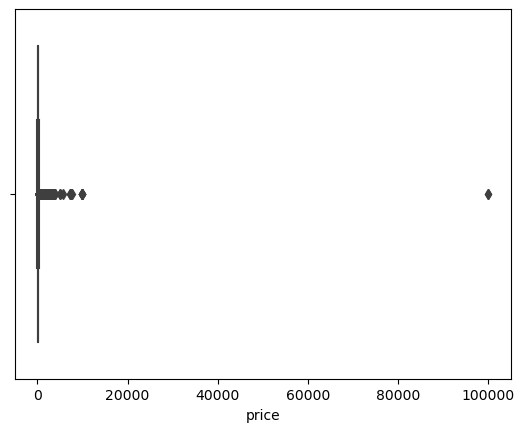

In [41]:
sns.boxplot(x=df.price)

In [52]:
df1=df.query('price < 1500')

<Axes: xlabel='price'>

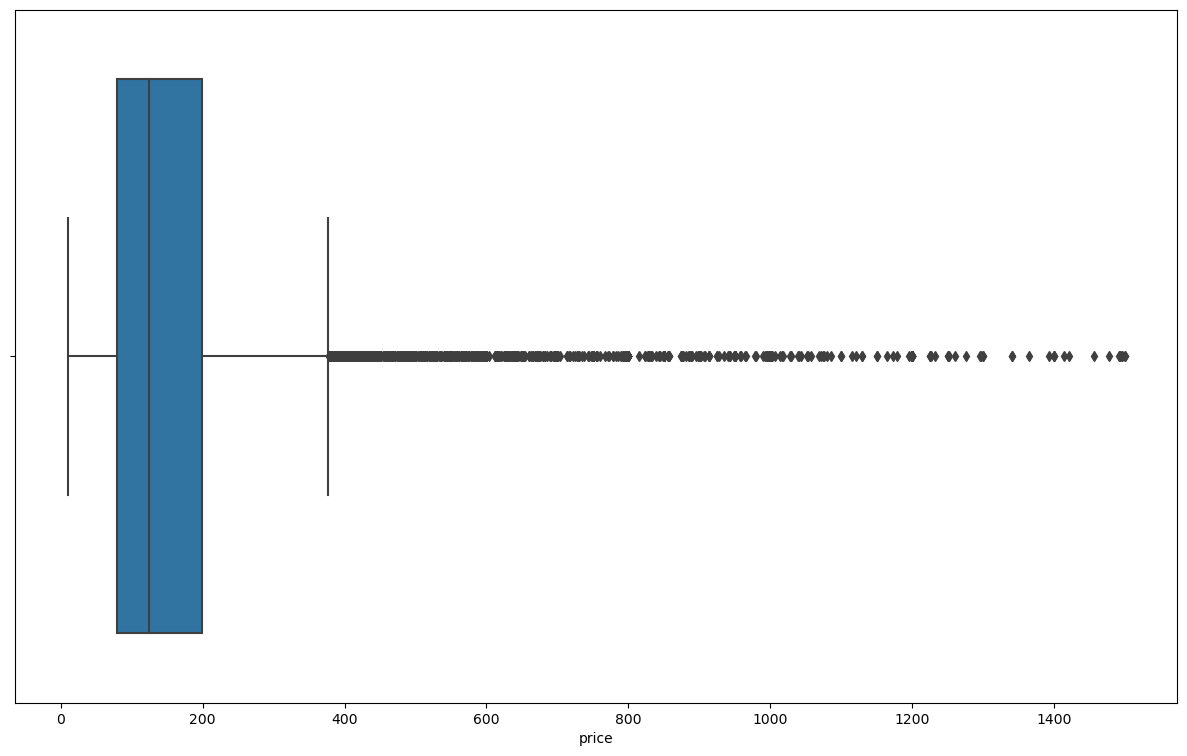

In [61]:
plt.figure(figsize=(15,9))
sns.boxplot(x=df1.price)

Text(0, 0.5, 'Frequency')

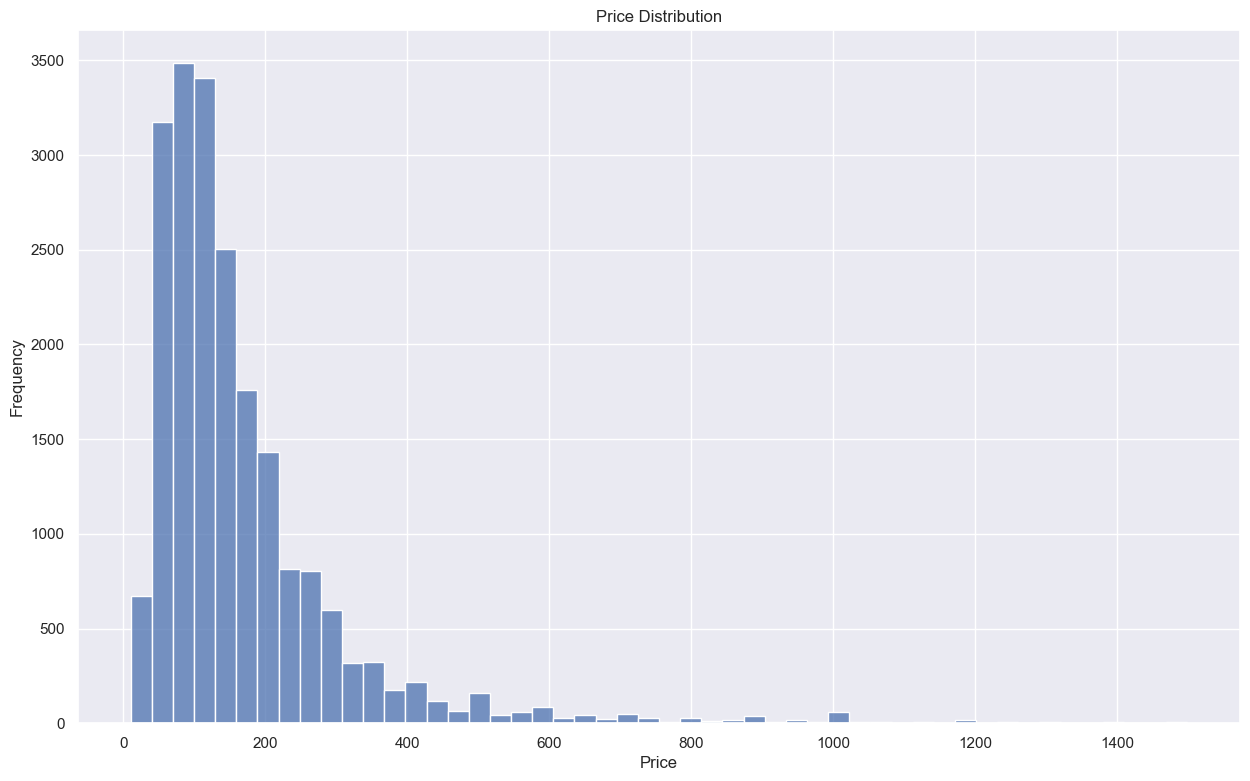

In [73]:
plt.figure(figsize=(15,9))
sns.histplot(x=df1.price,bins=50)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

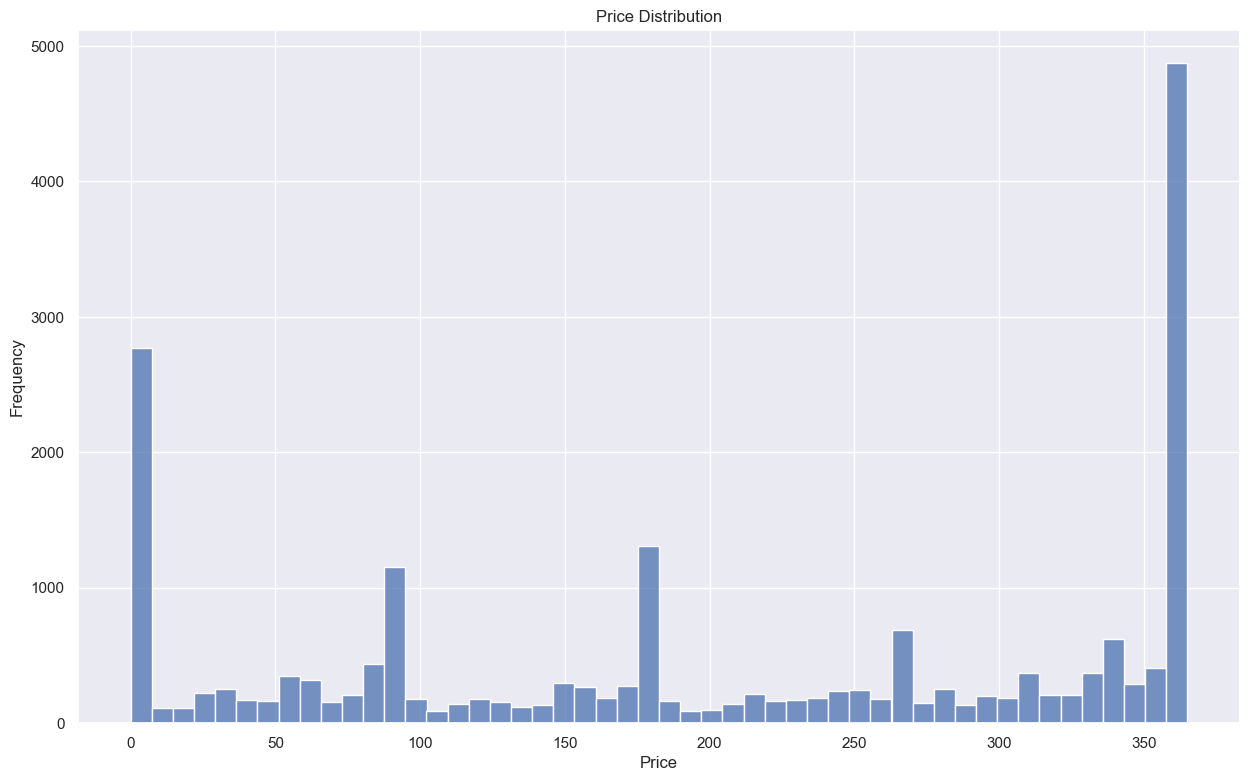

In [75]:
plt.figure(figsize=(15,9))
sns.histplot(x=df1.availability_365,bins=50)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [74]:
df1.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

In [80]:
df1.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx            107.990506
Brooklyn         155.138317
Manhattan        204.146014
Queens           121.681939
Staten Island    118.780069
Name: price, dtype: float64

In [82]:
df1['Price_per_bed']=df['price']/df['beds']

/var/folders/2z/f04fg9l13lvdkltmz_nd_9_h0000gn/T/ipykernel_2820/1648150690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Price_per_bed']=df['price']/df['beds']


In [83]:
df1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,Price_per_bed
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified,55.0
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,0.24,139.0,364.0,2.0,No License,4.67,2,1,1,144.0
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1,93.5
3,3857863.0,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,1.38,2.0,363.0,12.0,No License,4.64,1,1,1,120.0
4,40896611.0,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20765,24736896.0,Rental unit in New York · ★4.75 · 1 bedroom · ...,186680487,Henry D,Manhattan,Lower East Side,40.711380,-73.991560,Private room,45.0,...,1.81,1.0,157.0,12.0,No License,4.75,1,1,1,45.0
20766,2835711.0,Rental unit in New York · ★4.46 · 1 bedroom · ...,3237504,Aspen,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,...,0.48,1.0,0.0,1.0,No License,4.46,1,2,1,52.5
20767,51825274.0,Rental unit in New York · ★4.93 · 1 bedroom · ...,304317395,Jeff,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,...,2.09,1.0,0.0,27.0,No License,4.93,1,1,1,299.0
20768,783000000000000000.0,Rental unit in New York · ★5.0 · 1 bedroom · 1...,163083101,Marissa,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,115.0,...,0.91,1.0,363.0,7.0,No License,5,1,1,1,115.0


In [84]:
df1.groupby('neighbourhood_group')['Price_per_bed'].mean()

neighbourhood_group
Bronx             74.713639
Brooklyn          99.788493
Manhattan        138.708057
Queens            76.336210
Staten Island     67.728101
Name: Price_per_bed, dtype: float64

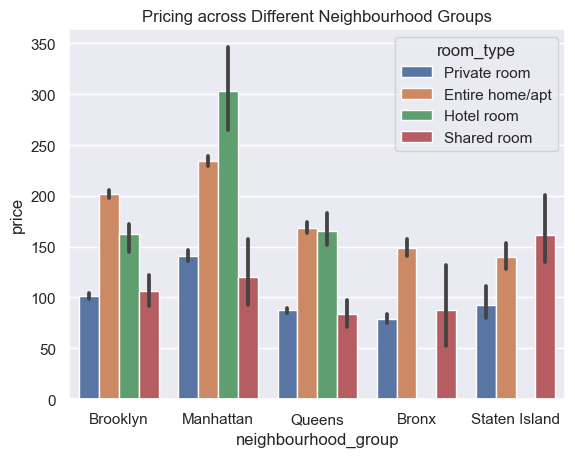

In [94]:
ax=sns.barplot(x=df1['neighbourhood_group'],y=df1['price'],hue=df1['room_type'])
plt.title('Pricing across Different Neighbourhood Groups')
sns.move_legend(ax,'upper right')
plt.show()

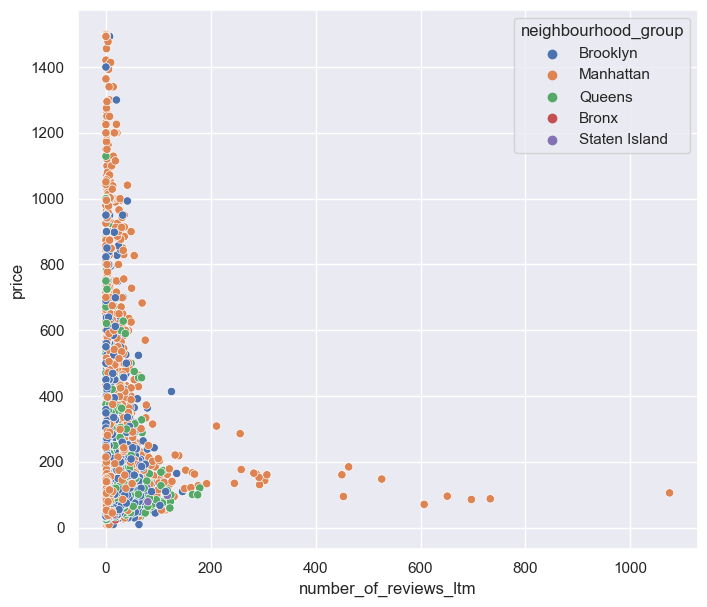

In [93]:
plt.figure(figsize=(8,7))
sns.scatterplot(data=df1,x='number_of_reviews_ltm',y='price',hue='neighbourhood_group')
plt.show()

/var/folders/2z/f04fg9l13lvdkltmz_nd_9_h0000gn/T/ipykernel_2820/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

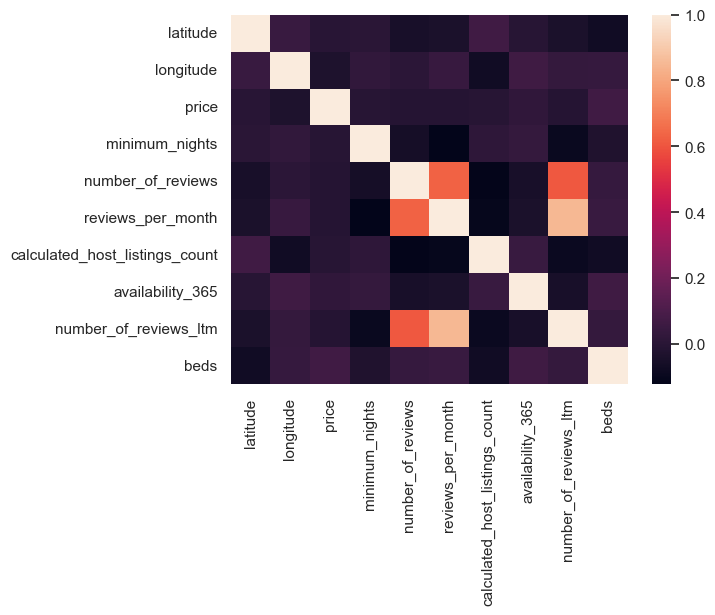

In [96]:
sns.heatmap(df.corr())

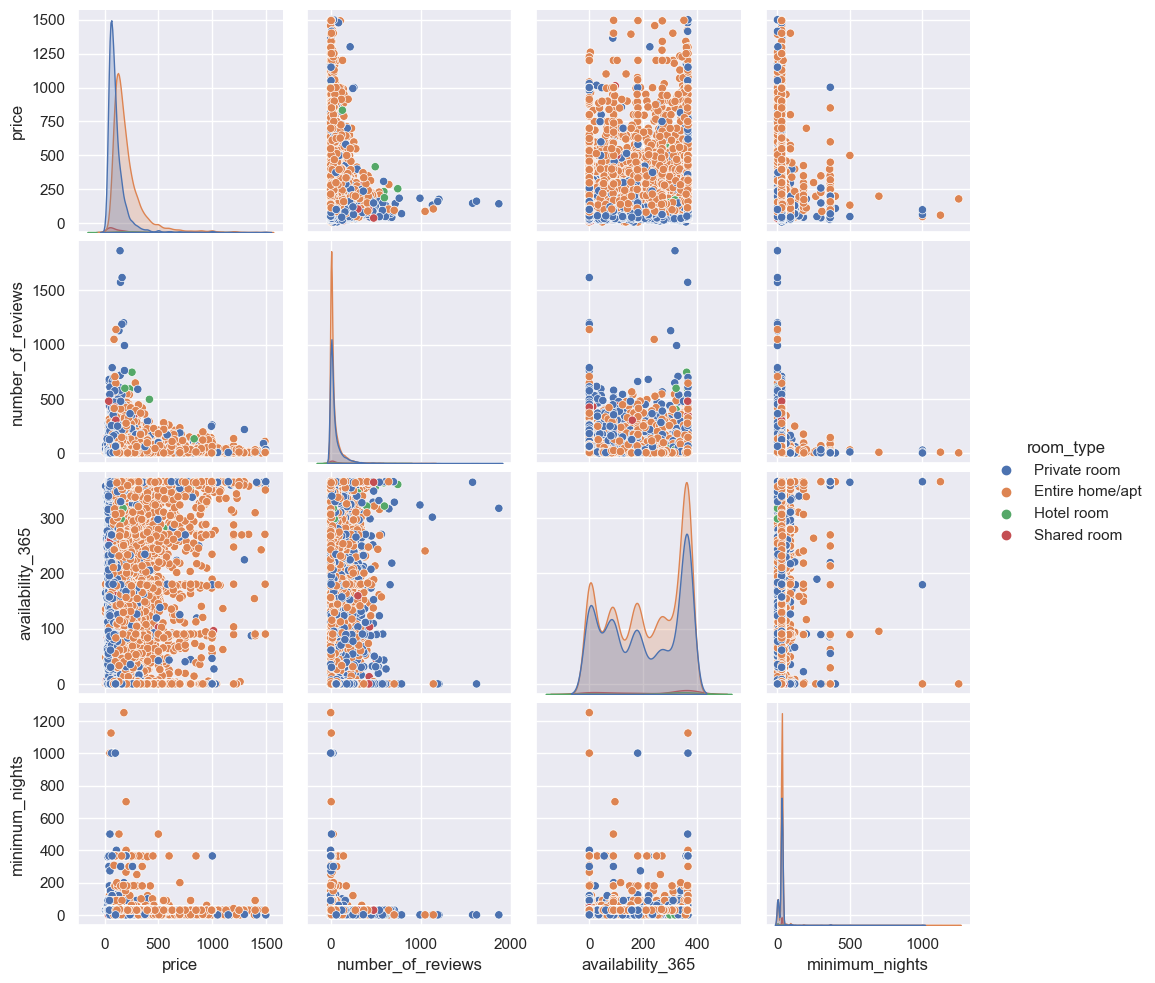

In [98]:
sns.pairplot(data=df1,vars=['price','number_of_reviews','availability_365','minimum_nights'],hue='room_type')

In [99]:
import plotly.express as px

In [104]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

In [114]:
corr=df[['neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews',
       'reviews_per_month',
       'availability_365', 'number_of_reviews_ltm','rating',
       'bedrooms', 'beds', 'baths']]

/var/folders/2z/f04fg9l13lvdkltmz_nd_9_h0000gn/T/ipykernel_2820/897856180.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

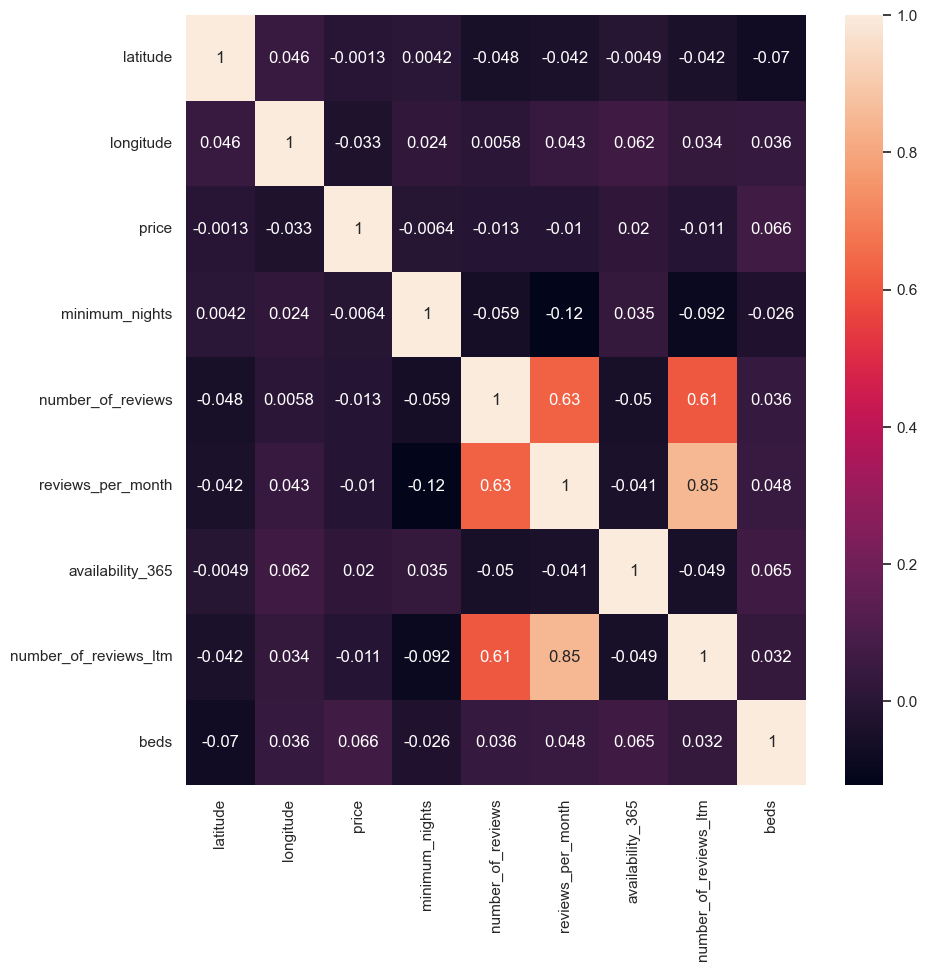

In [120]:
plt.figure(figsize=(10,10))
sns.heatmap(corr.corr(),annot=True)

# 5. Key Findings
### 5.1 Insights Gathered
- **Neighborhoods greatly impact pricing**, with urban areas having higher rental costs.
- **Entire homes are priced significantly higher** than shared/private rooms.
- **Seasonality affects availability**, with peak tourist seasons leading to price hikes.
- **High-rated listings attract more bookings**, showcasing the importance of guest satisfaction.
- **More reviews correlate with higher demand**, suggesting customer feedback plays a key role in booking decisions.

### 5.2 Future Recommendations
- Conduct further research on the impact of external factors such as tourism trends and economic conditions on Airbnb pricing.
- Implement machine learning models to predict optimal pricing strategies based on historical data.
- Analyze customer sentiment from reviews to improve Airbnb listing descriptions and services.

## 6. Conclusion
This Airbnb analysis provides valuable insights into **pricing strategies, occupancy trends, and customer behavior**. The findings help hosts optimize their listings by adjusting prices based on seasonality and location trends. Future analysis could incorporate **external factors like tourism trends, economic conditions, and competitor pricing strategies** for deeper insights.

By leveraging these insights, Airbnb hosts can maximize profitability, and travelers can make informed booking decisions.
